In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
diabetes_df = pd.read_csv("./Datasets/diabetes.csv")
train_df, test_df = train_test_split(diabetes_df, test_size = 0.2, random_state = 12)
X_train = train_df.drop("Outcome", axis = 1)
y_train = train_df["Outcome"]
X_test = test_df.drop("Outcome", axis = 1)
y_test = test_df["Outcome"]

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Best Cross-validation Score: 0.5848234807183645

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



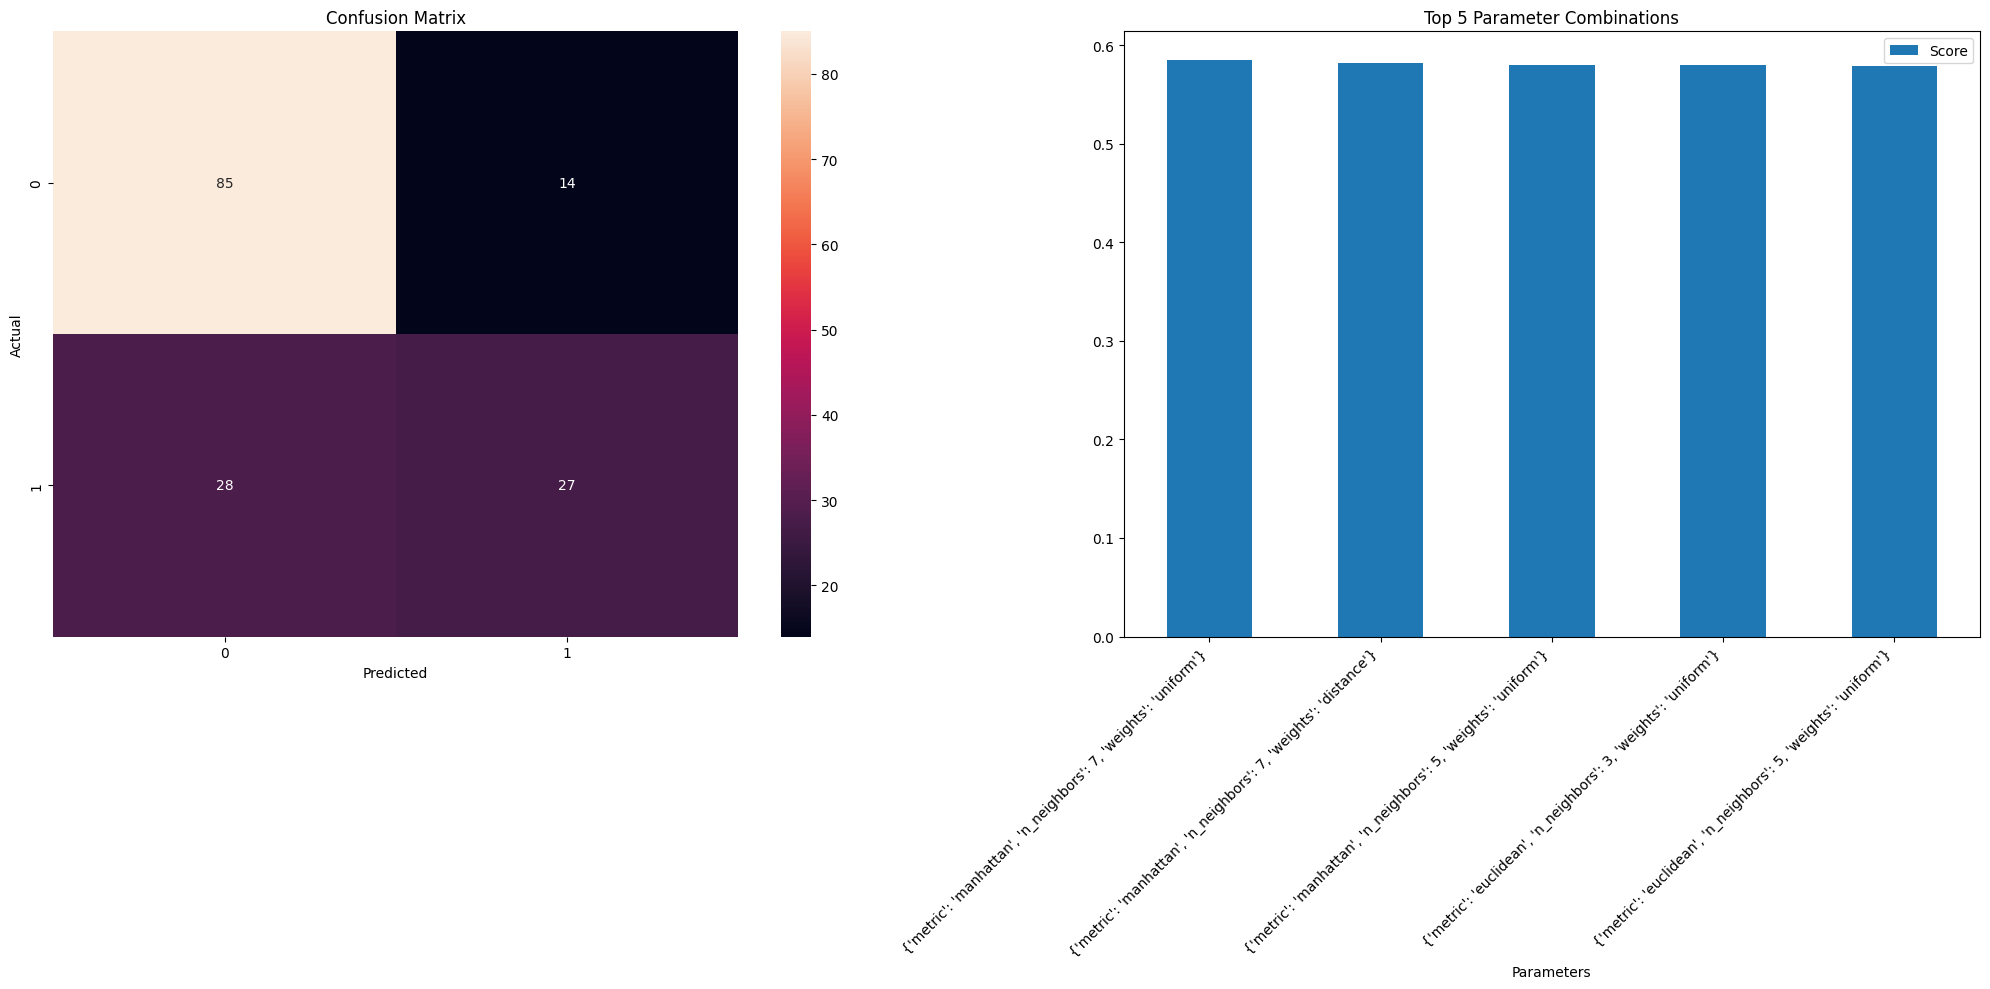

In [5]:
results_knn = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [6]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: SkinThickness
Current performance: 0.77922
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: DiabetesPedigreeFunction
Current performance: 0.81169
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']


Removed feature: Pregnancies
Current performance: 0.81169
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']


Removed feature: BloodPressure
Current performance: 0.7987
Remaining features: ['Glucose', 'Insulin', 'BMI', 'Age']


Removed feature: Age
Current performance: 0.77273
Remaining features: ['Glucose', 'Insulin', 'BMI']



Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'alpha': 0.01, 'eta0': 0.5, 'max_iter': 1000, 'penalty': 'l1'}

Best Cross-validation Score: 0.6372654119623583

Feature Importances: {'Pregnancies': np.float64(0.0), 'Glucose': np.float64(0.9195681680965855), 'BloodPressure': np.float64(0.0), 'SkinThickness': np.float64(0.0), 'Insulin': np.float64(0.0), 'BMI': np.float64(0.2951180320007556), 'DiabetesPedigreeFunction': np.float64(0.0), 'Age': np.float64(0.0)}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



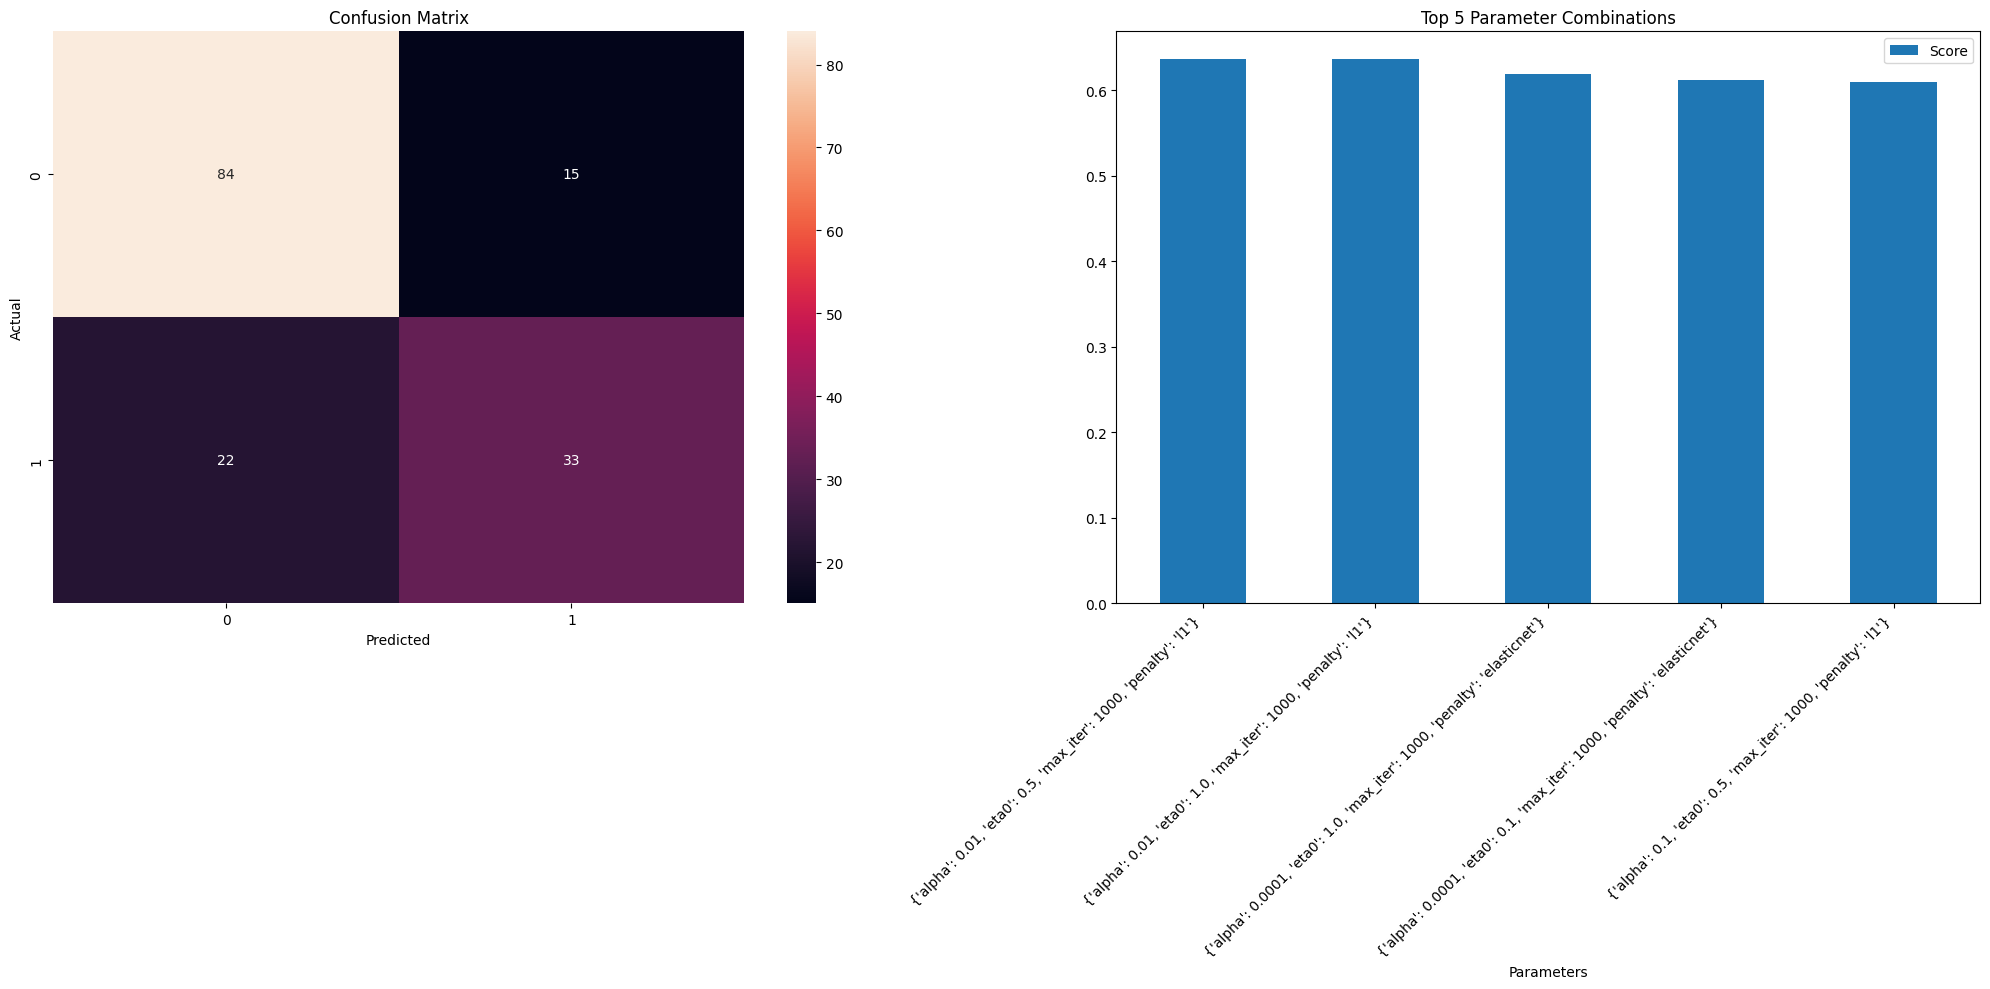

In [7]:
results_perceptron = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [8]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: Age
Current performance: 0.79221
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: SkinThickness
Current performance: 0.72727
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: BloodPressure
Current performance: 0.74026
Remaining features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: Insulin
Current performance: 0.75974
Remaining features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: Pregnancies
Current performance: 0.7013
Remaining features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']



Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-validation Score: 0.6676717528533214

Feature Importances: {'Pregnancies': np.float64(0.08177344780953856), 'Glucose': np.float64(0.24623813505293496), 'BloodPressure': np.float64(0.09550634442128382), 'SkinThickness': np.float64(0.0703857882149952), 'Insulin': np.float64(0.08102823029623325), 'BMI': np.float64(0.14813879881215672), 'DiabetesPedigreeFunction': np.float64(0.1356798816117429), 'Age': np.float64(0.14124937378111468)}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



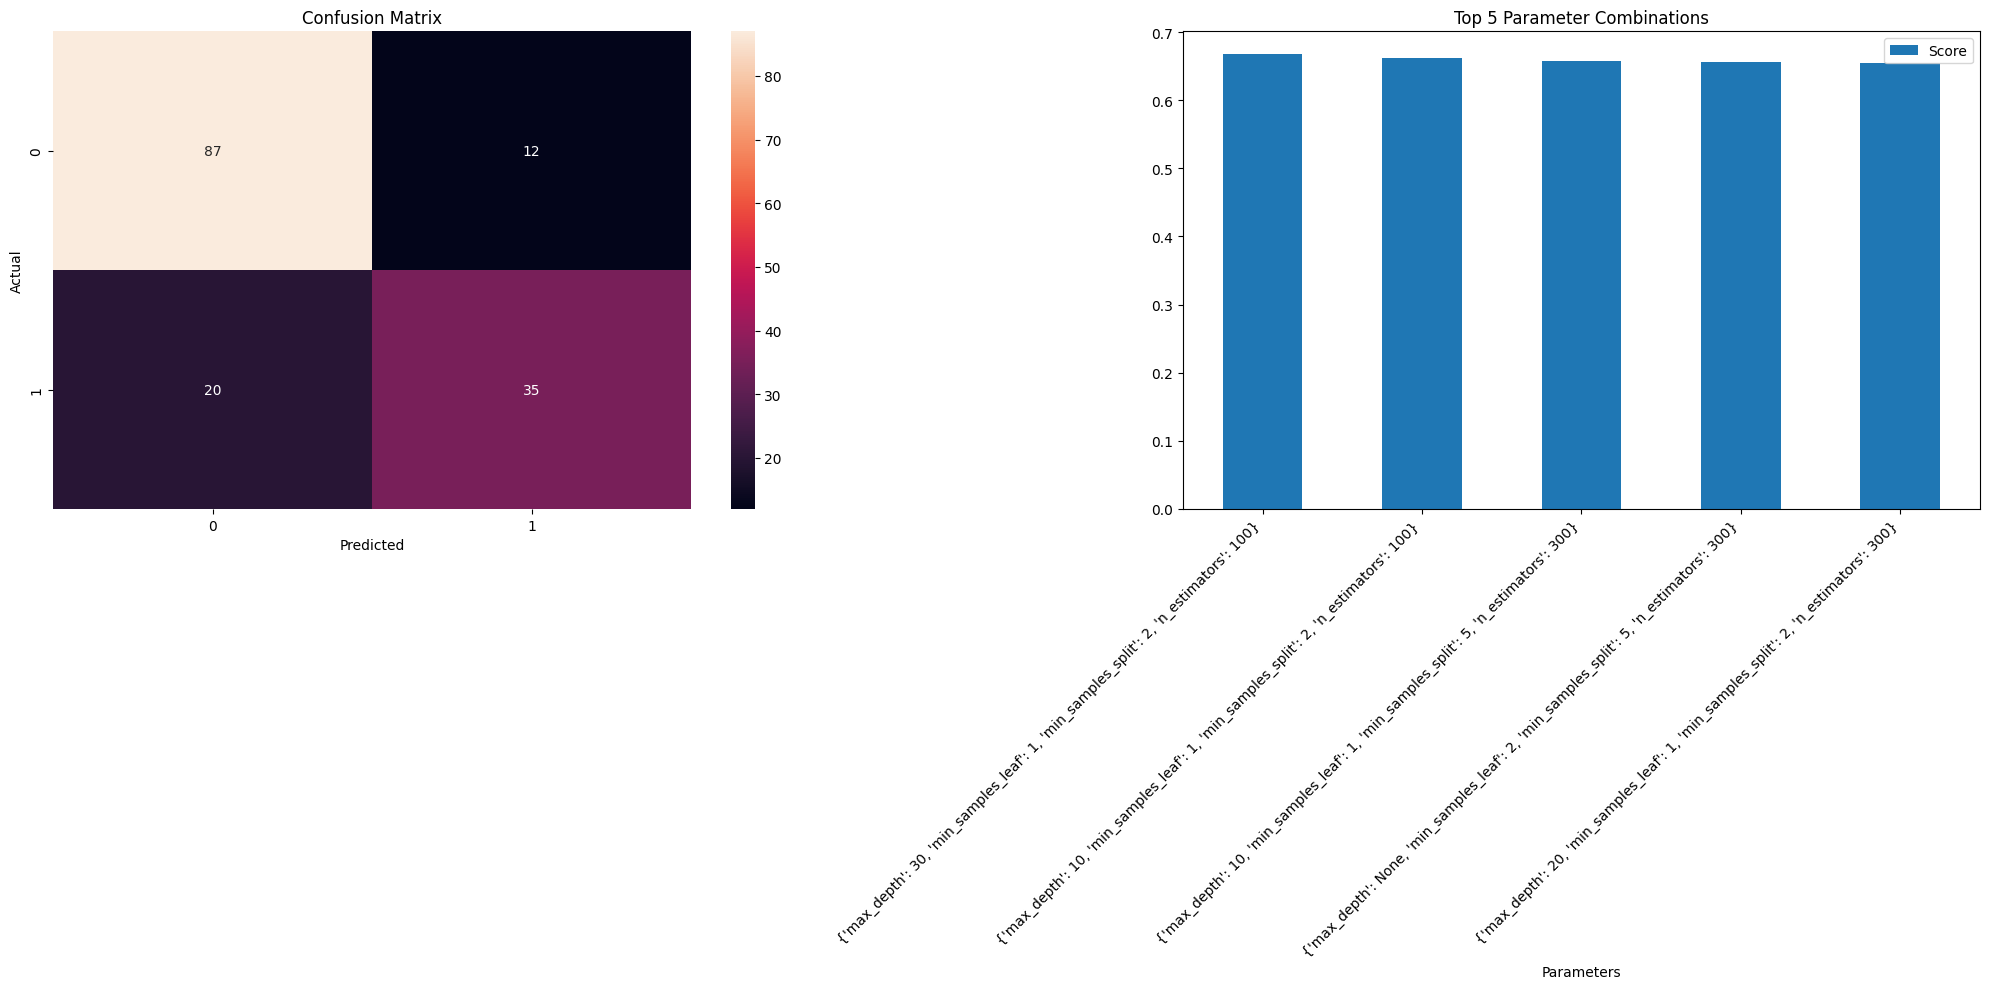

In [9]:
results_rf = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [10]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: Insulin
Current performance: 0.82468
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: DiabetesPedigreeFunction
Current performance: 0.81818
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']


Removed feature: SkinThickness
Current performance: 0.80519
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


Removed feature: Pregnancies
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'BMI', 'Age']


Removed feature: BMI
Current performance: 0.77273
Remaining features: ['Glucose', 'BloodPressure', 'Age']



Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Cross-validation Score: 0.5877054097209136

Feature Importances: {'Pregnancies': np.float64(0.07324608456386923), 'Glucose': np.float64(0.3218691989359549), 'BloodPressure': np.float64(0.045854250142983395), 'SkinThickness': np.float64(0.05594461240105621), 'Insulin': np.float64(0.047647691676790165), 'BMI': np.float64(0.18165819666999725), 'DiabetesPedigreeFunction': np.float64(0.14610153835867942), 'Age': np.float64(0.12767842725066952)}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        99
           1       0.63      0.58      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



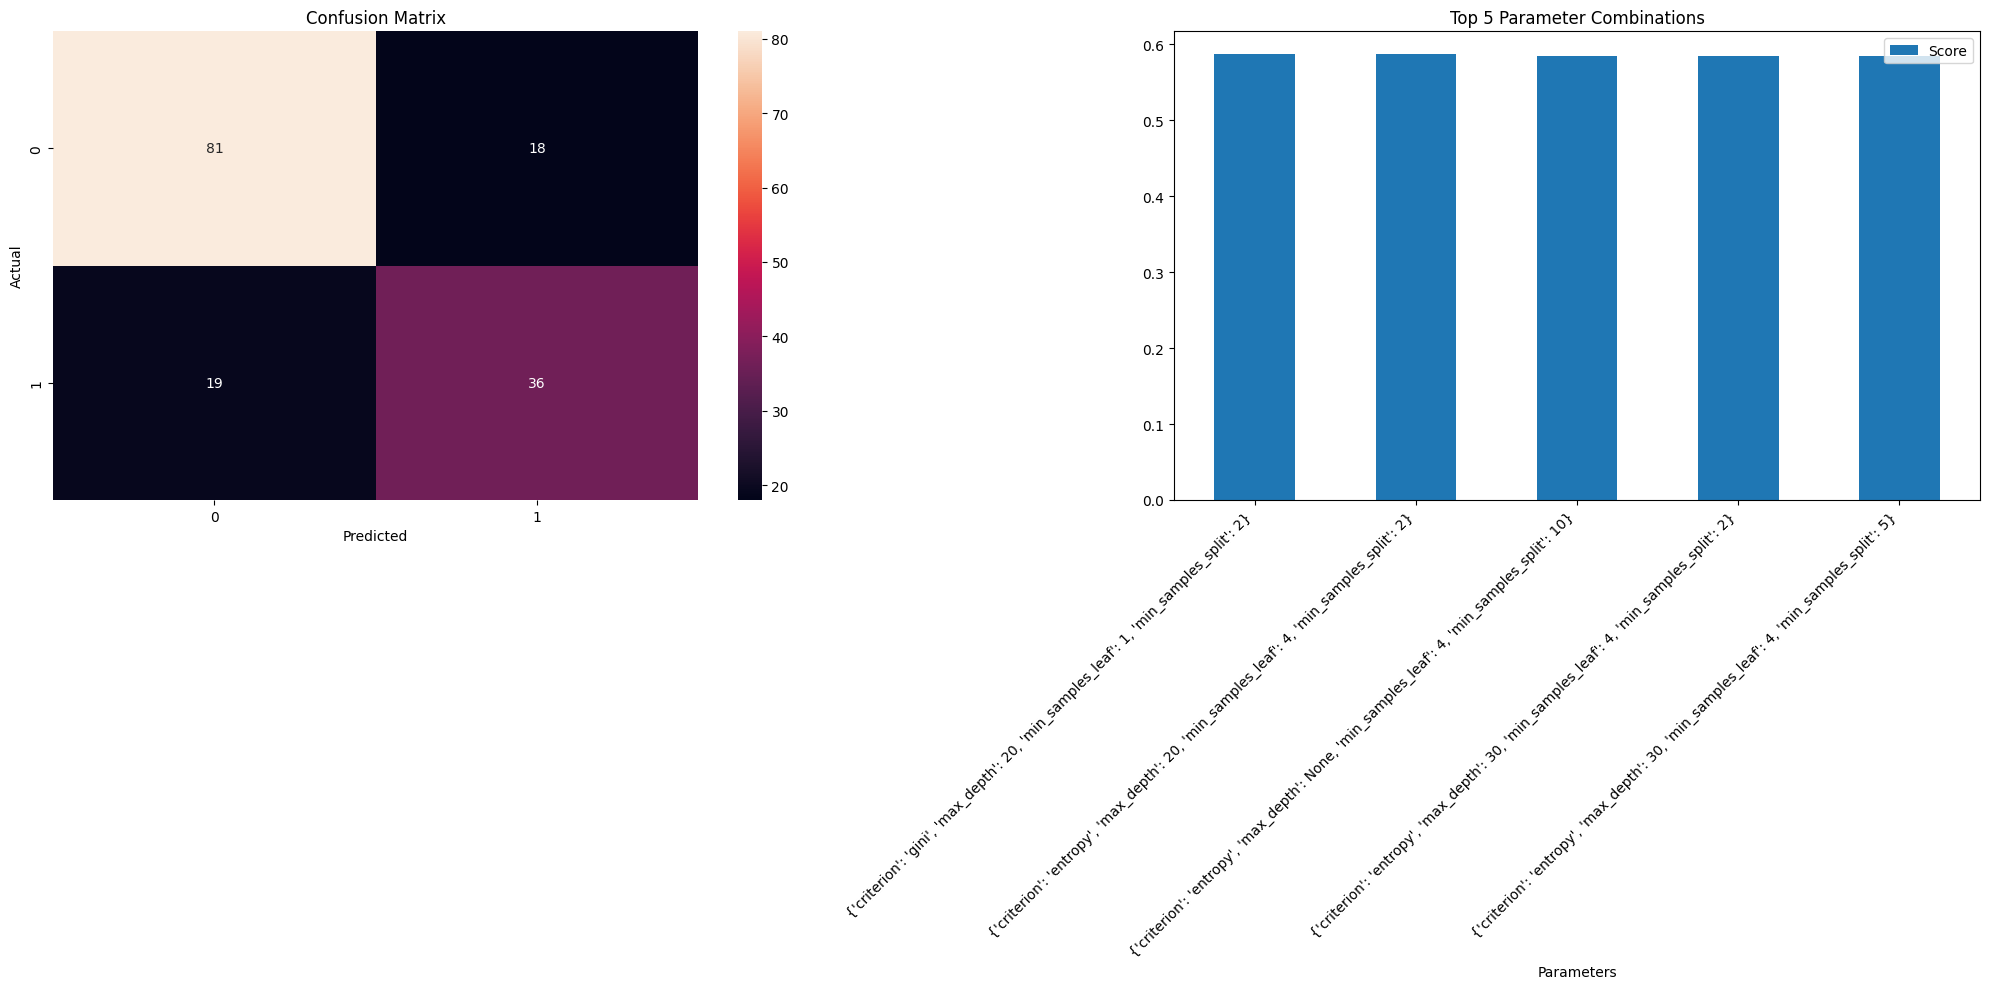

In [11]:
results_dt = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [12]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: SkinThickness
Current performance: 0.74675
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Pregnancies
Current performance: 0.73377
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: BloodPressure
Current performance: 0.73377
Remaining features: ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Age
Current performance: 0.72727
Remaining features: ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: DiabetesPedigreeFunction
Current performance: 0.66883
Remaining features: ['Glucose', 'Insulin', 'BMI']



Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-validation Score: 0.632433639750957

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154



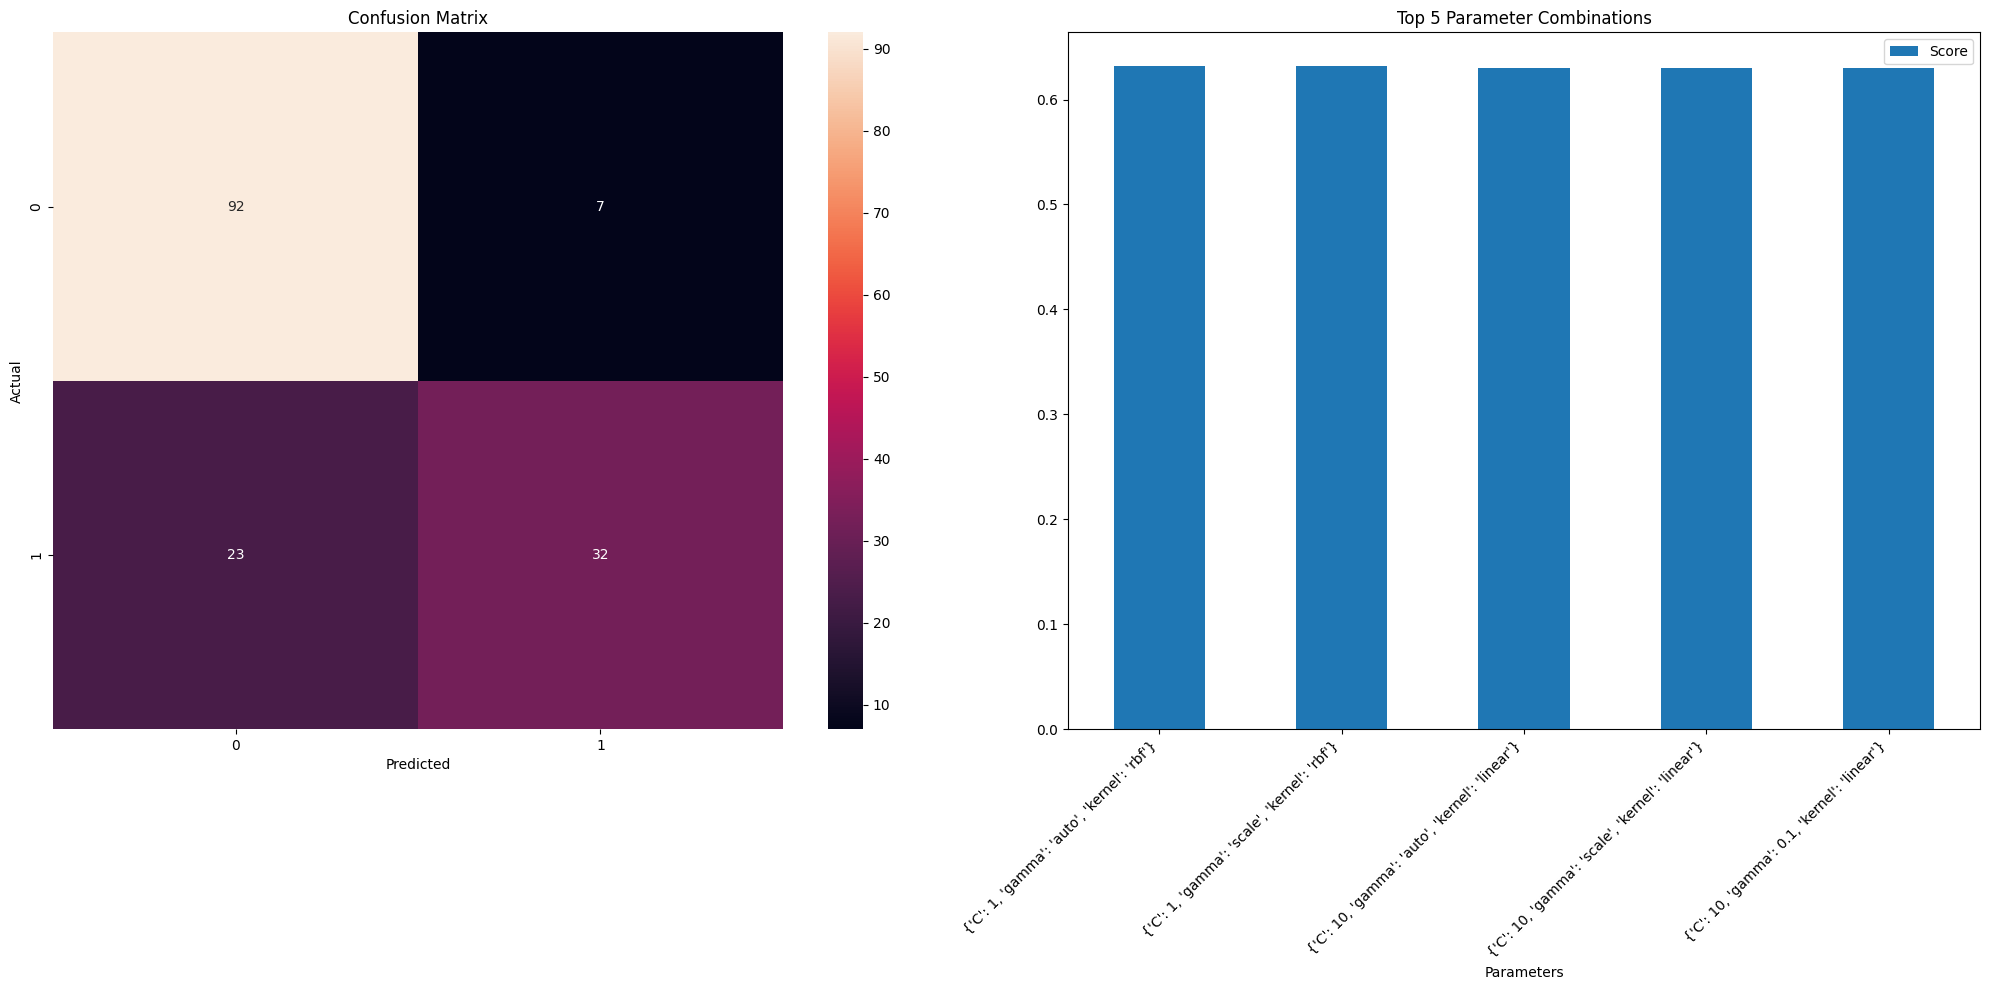

In [13]:
results_svm = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm')

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [14]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: BMI
Current performance: 0.82468
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Pregnancies
Current performance: 0.81818
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: SkinThickness
Current performance: 0.81169
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: BloodPressure
Current performance: 0.80519
Remaining features: ['Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Insulin
Current performance: 0.78571
Remaining features: ['Glucose', 'DiabetesPedigreeFunction', 'Age']



Fitting 5 folds for each of 56 candidates, totalling 280 fits

Best Parameters: {'epochs': 50, 'learning_rate': 1e-05, 'random_state': 46, 'verbose': False}

Best Cross-validation Score: 0.6492236630892949

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



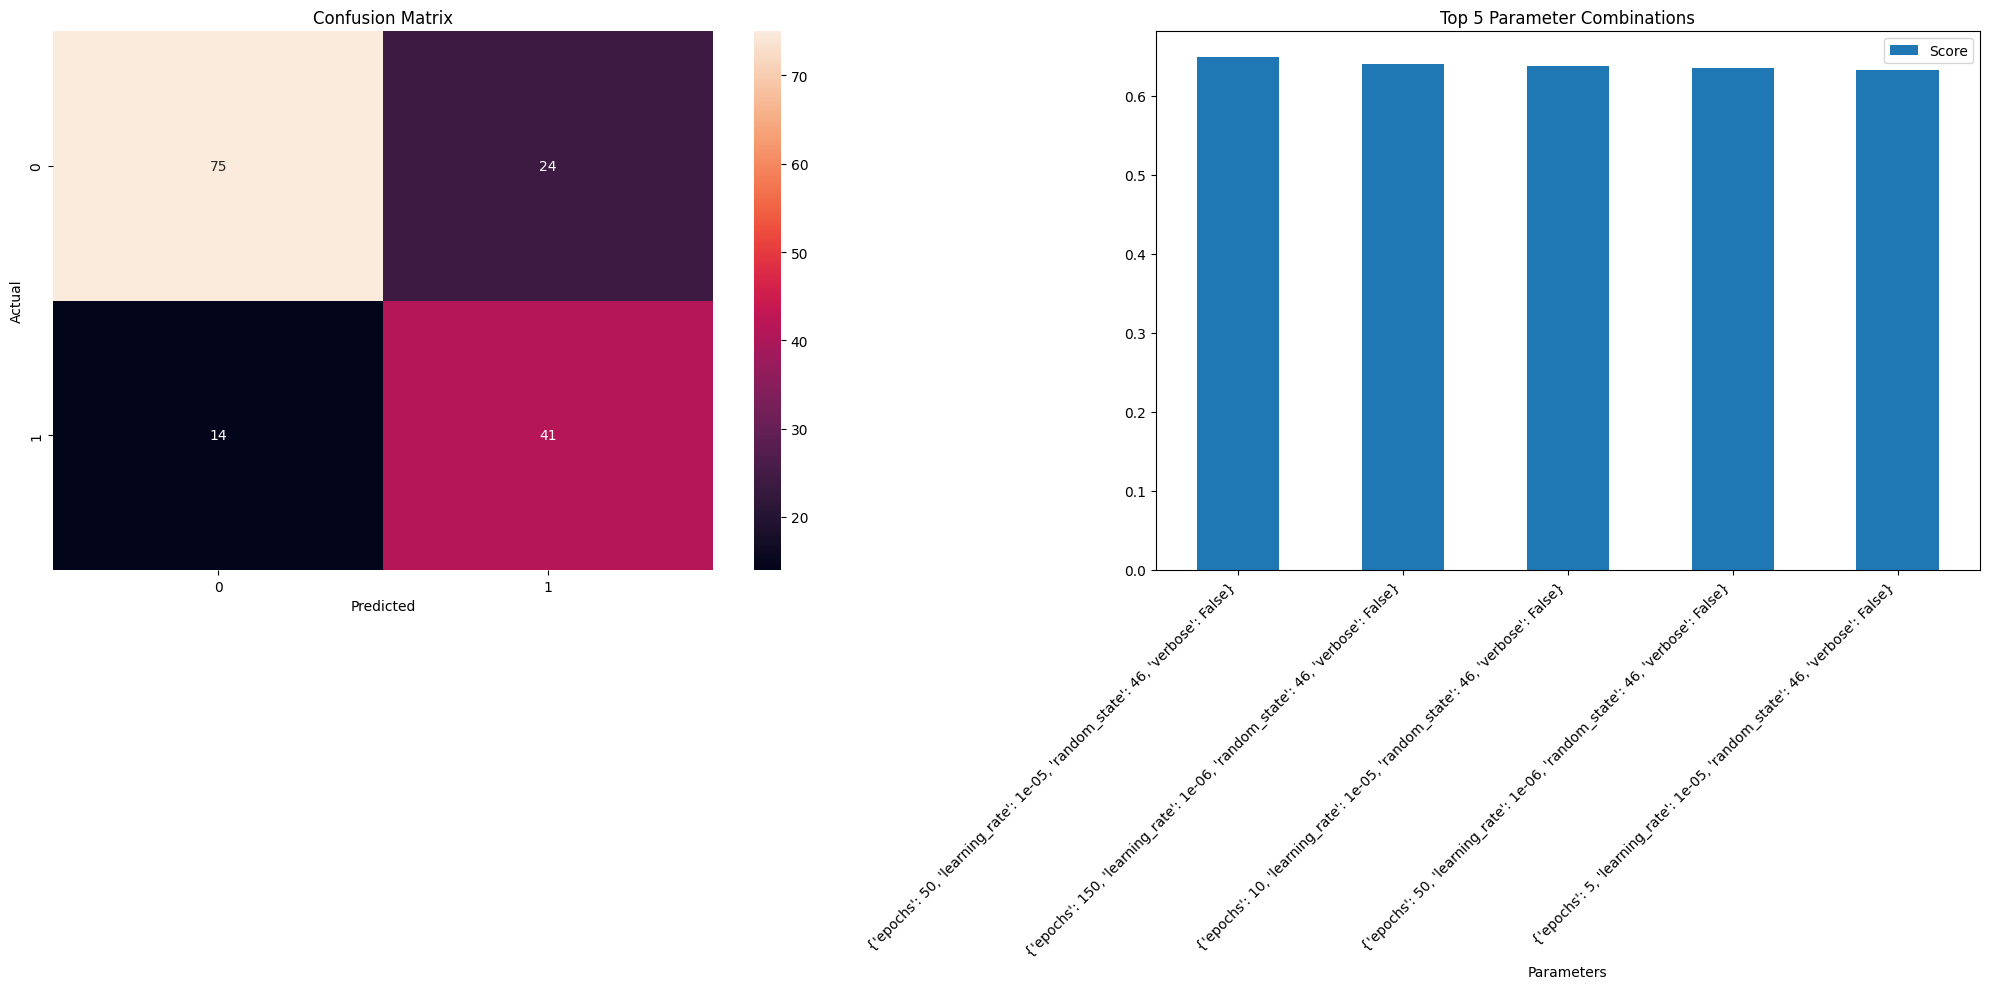

In [15]:
results_mpa = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'mpa')

print("\nBest Parameters:", results_mpa['best_parameters'])
print("\nBest Cross-validation Score:", results_mpa['best_score'])
print("\nFeature Importances:", results_mpa['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_mpa['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [16]:
mpa_classifier = mpa(**results_mpa['best_parameters'])

sbs_mpa = SequentialBackwardSelection(estimator=mpa_classifier,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_mpa.fit(X_train, X_test, y_train, y_test)


Removed feature: Insulin
Current performance: 0.78571
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Age
Current performance: 0.77922
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: BloodPressure
Current performance: 0.77922
Remaining features: ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: SkinThickness
Current performance: 0.79221
Remaining features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: DiabetesPedigreeFunction
Current performance: 0.77922
Remaining features: ['Pregnancies', 'Glucose', 'BMI']

